# Week 6 : Classification Exercise (Indian Diabetes Dataset)


---

Import Libraries

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

# Import necessary libraries for data processing to modelling

Load Dataset

In [116]:
# 1. Import Dataset
df = pd.read_csv('https://raw.githubusercontent.com/Zwelious/DM_W2/main/diabetes.csv')
df.sample(n=10)

# Viewing random 10 rows of the data.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
750,4,136,70,0,0,31.2,1.182,22,1
652,5,123,74,40,77,34.1,0.269,28,0
368,3,81,86,16,66,27.5,0.306,22,0
550,1,116,70,28,0,27.4,0.204,21,0
23,9,119,80,35,0,29.0,0.263,29,1
412,1,143,84,23,310,42.4,1.076,22,0
678,3,121,52,0,0,36.0,0.127,25,1
716,3,173,78,39,185,33.8,0.970,31,1
402,5,136,84,41,88,35.0,0.286,35,1
178,5,143,78,0,0,45.0,0.190,47,0


Exploratory Data Analysis

In [117]:
# 2. Display the info column
df.info()

# This is used to check datatype for each columns, as well as how many non-null values, and how many entries are in the dataset.
# There is a total of 768 entries across all columns, with the all of the datatypes being numerical values (no objects were seen)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [118]:
# 3. Display the describe column
df.describe()

# This is used to display the numerical values of each numerical attributes, starting from rows count, average, standard deviation, each quartile, and lastly minimum and maximum value.
# We can see that insulin is the entity with the highest range (seen from the standard deviation and highest maximum value)
# On the other hand, Outcome only ranges from 0 to 1, showing the smallest range between them all.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [119]:
# 4. Unique values count for categorical column (in this case target column "Outcome")
print(df['Outcome'].value_counts(dropna=False))

# The dataset has more outcomes of 0 (almost twice the value of the outcomes of 1)
# 0 for false, 1 for true (diabetes)

Outcome
0    500
1    268
Name: count, dtype: int64


In [120]:
# 5. Null handling
df.isnull().sum()

# The table below shows the number of null values in each columns, where as shown below, the dataset has no missing values.

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Data Visualization

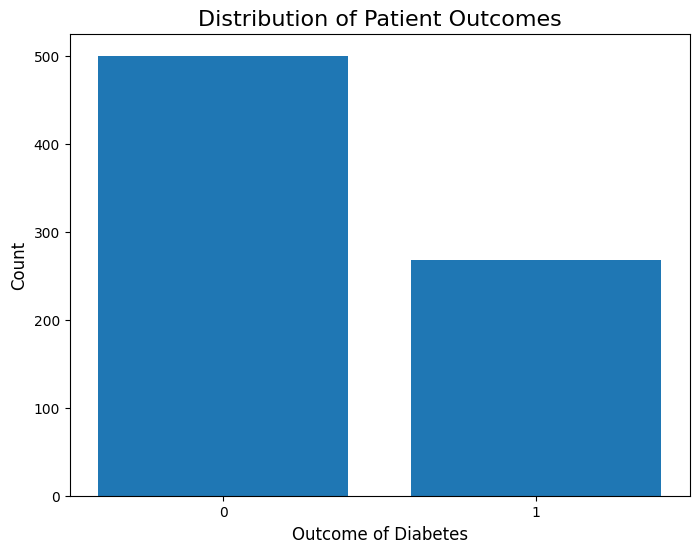

In [121]:
# 1. Bar Chart
outcome_counts = df['Outcome'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(outcome_counts.index, outcome_counts.values)

plt.title('Distribution of Patient Outcomes', fontsize=16)
plt.xlabel('Outcome of Diabetes', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks([0, 1])

plt.show()

# The bar chart shows the comparison of the outcomes, where we can see that a lot of the patients are not diagnosed with diabetes.

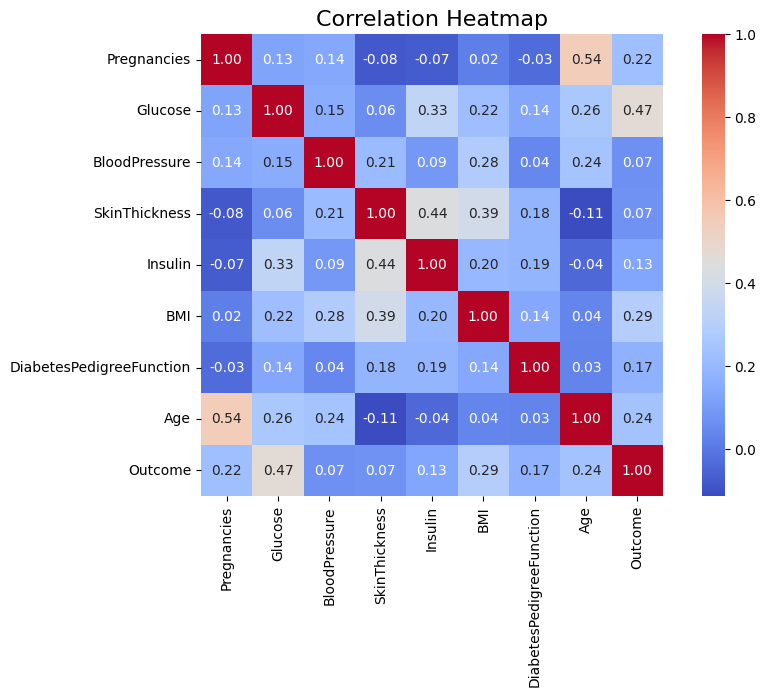

In [122]:
# 2. Correlation heatmap

correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# The correlation heatmap shows the correlation of each attributes to the target variable (Outcome)
# The most related attribute is the glucose level of the patient, followed by BMI and age of each.
# However, the most unrelated attribute is blood pressure and skin thickness.

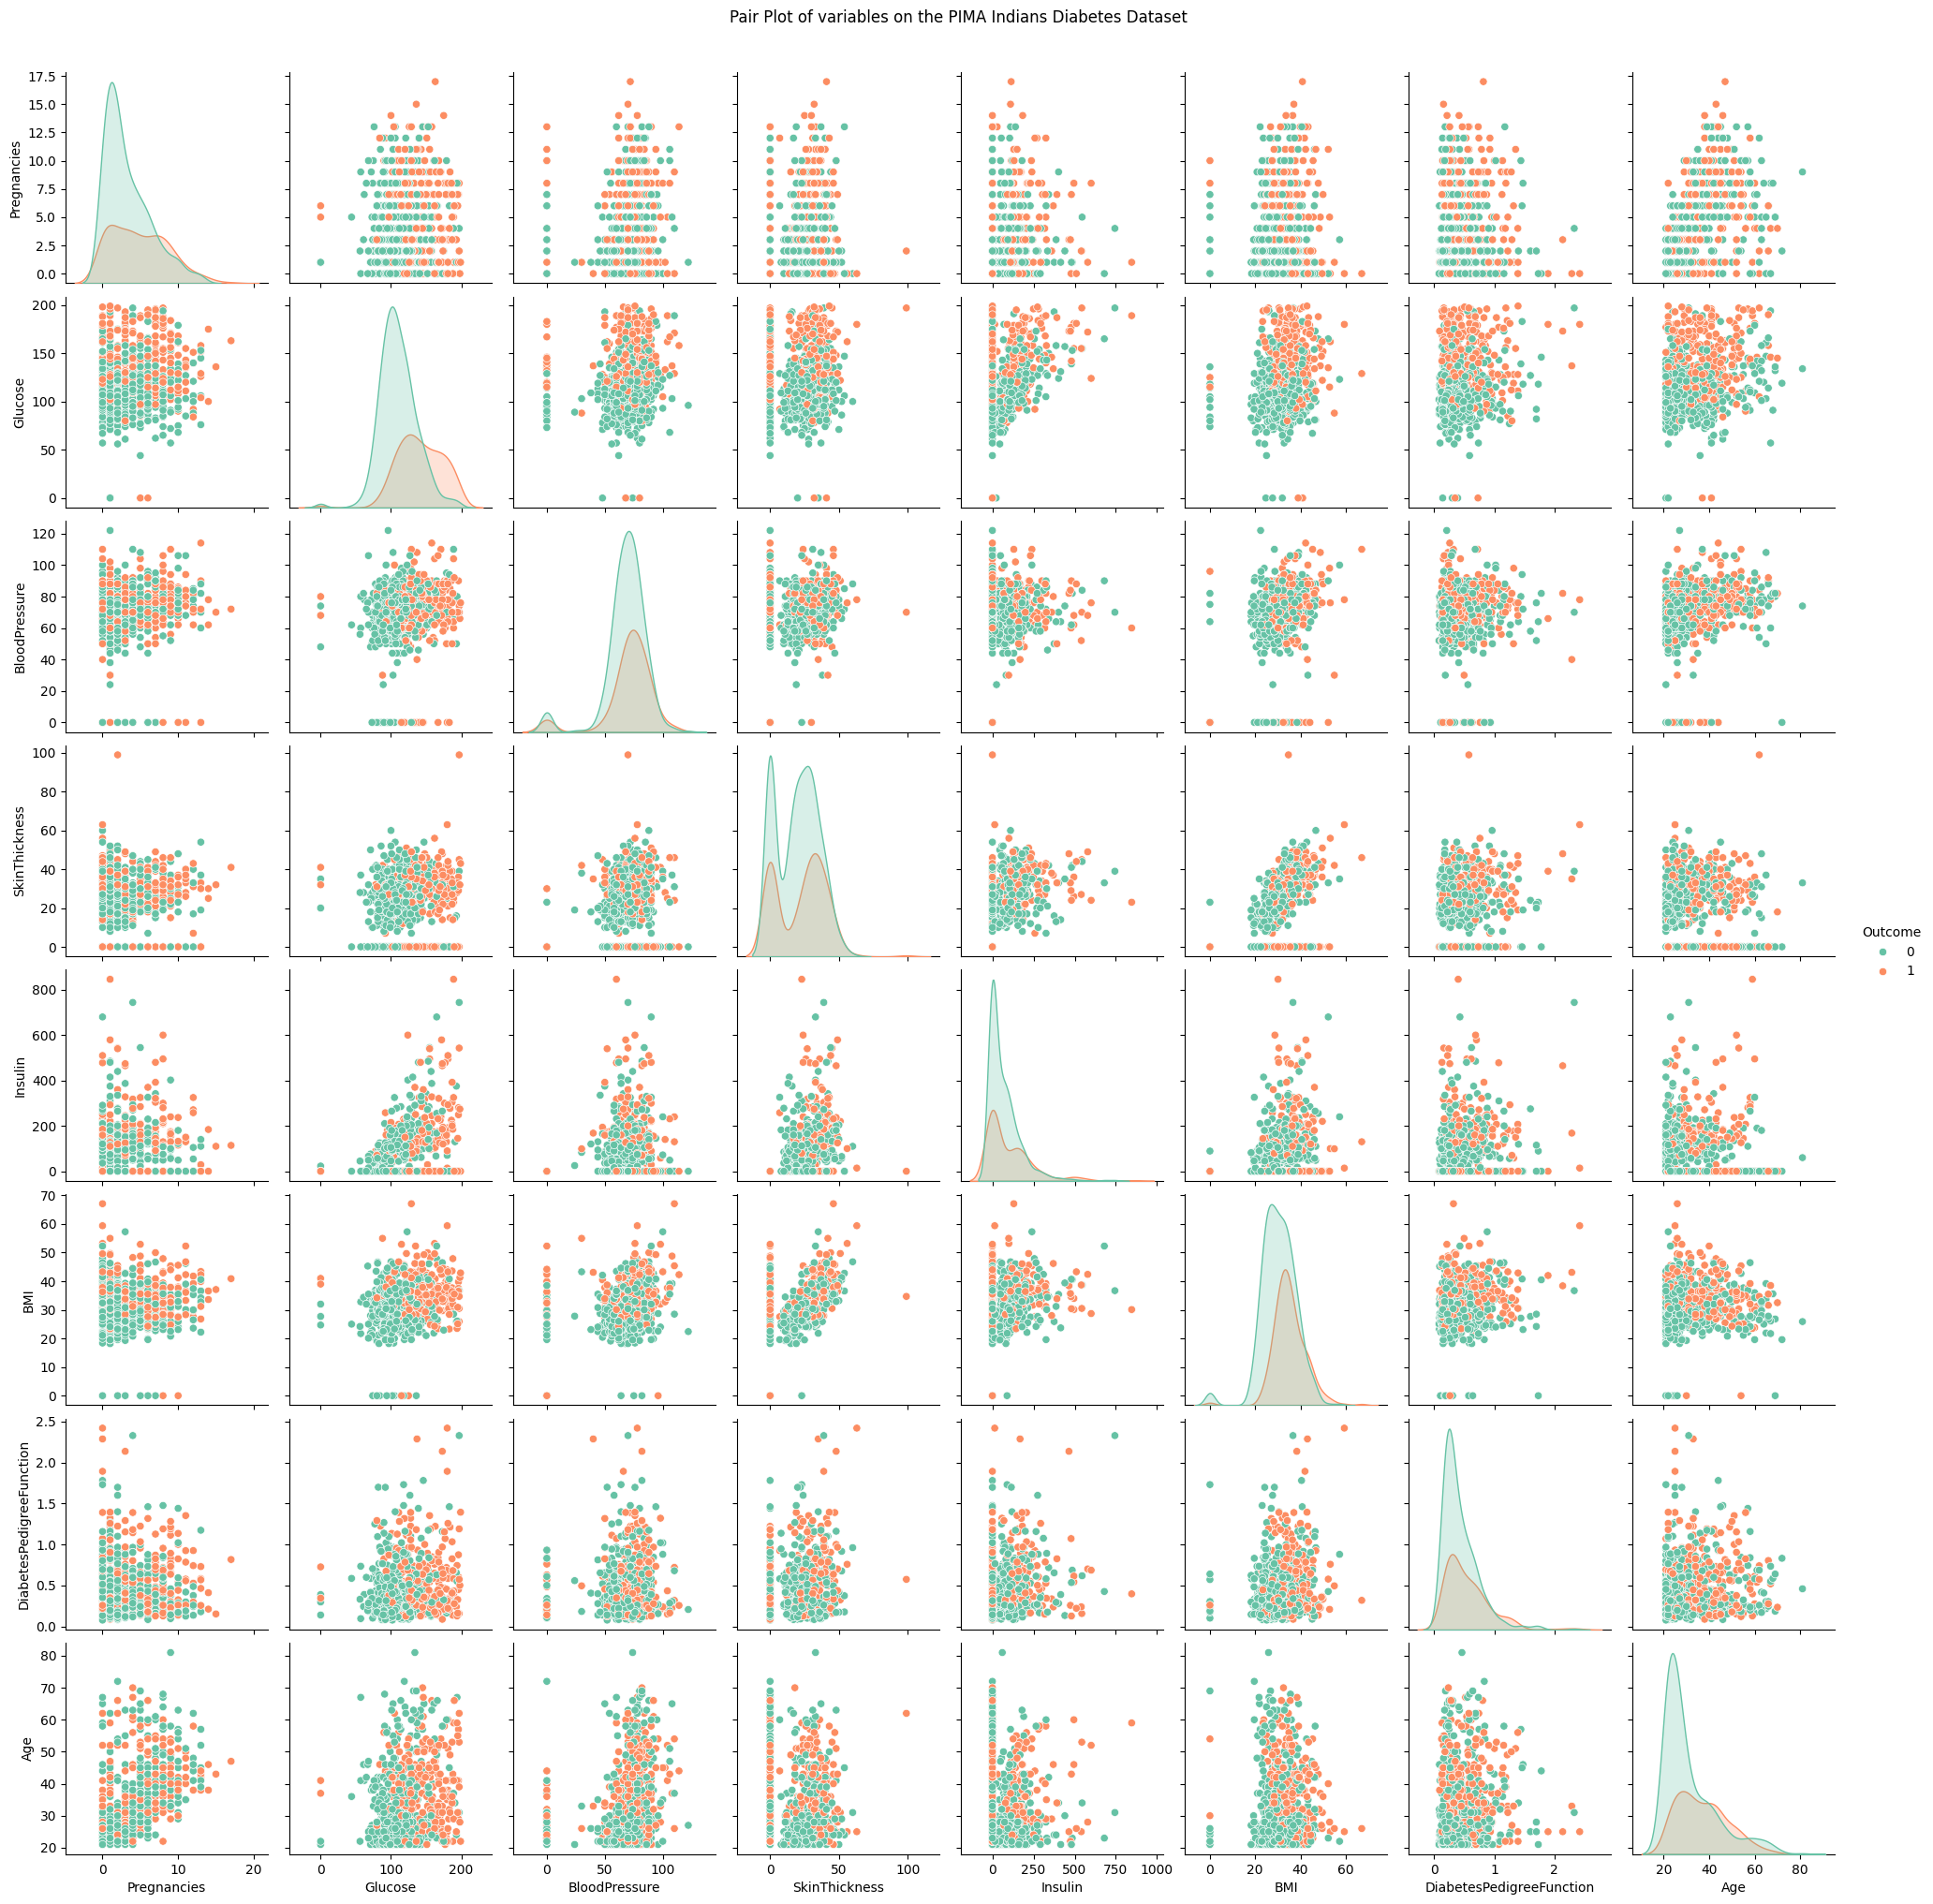

In [123]:
# 3. Pairplot
sns.pairplot(df, hue='Outcome', palette='Set2', diag_kind='kde')
plt.suptitle('Pair Plot of variables on the PIMA Indians Diabetes Dataset', y=1.02)
plt.show()

# From the pairplot, the most obvious summary is the glucose level (also proven by correlation heatmap).
# When the glucose level is high, the more outcomes become 1.
# Then, we can also conclude that the higher the BMI (body mass index), also the higher chance of diabetes.

Machine Learning

In [124]:
# 1. Decision Tree (Criterion Entropy) Classification

X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

# First is to declare which variable is the target variable (also dropping the target variable in the X).

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Next is to divide the dataset into 80% train data (for training the model), and 20% testing data.

In [126]:
X_train.shape, X_test.shape
# To make sure the shape of each train and test data is true to 80-20 division.

((614, 8), (154, 8))

In [127]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
clf_en.fit(X_train, y_train)

# Decision Tree Modelling using Criterion Entropy.

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [128]:
y_pred_en = clf_en.predict(X_test)

# Predicting the X_test using Criterion Entropy.

In [129]:
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

# Showing the accuracy score based on the y_test and y_pred, and it results with a decent 76.6 percent accuracy.

Model accuracy score with criterion entropy: 0.7662


In [130]:
y_train_en = clf_en.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_en)
training_accuracy = accuracy_score(y_train, y_train_en)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

# Since the margin is only less than 5%, we can conclude that the model is well-fitted.

Testing accuracy: 0.7662
Training accuracy: 0.7752


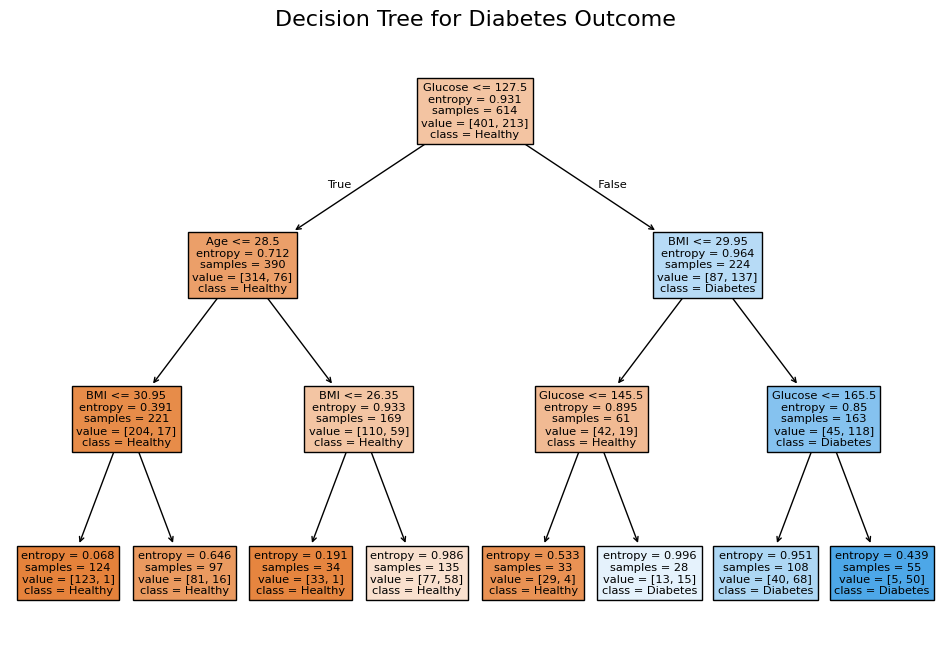

In [131]:
from sklearn import tree

plt.figure(figsize=(12, 8))
tree.plot_tree(clf_en, feature_names=X.columns, class_names=["Healthy", "Diabetes"], filled=True)
plt.title('Decision Tree for Diabetes Outcome', fontsize=16)
plt.show()

# Using matplotlib to create the decision tree of the Criterion Entropy algorithm.

In [132]:
# 2. Decision Tree (Criterion Gini) Classification

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
clf_gini.fit(X_train, y_train)

# Decision Tree Modelling using Criterion Gini.

DecisionTreeClassifier(max_depth=3, random_state=0)

In [133]:
y_pred_gini = clf_gini.predict(X_test)

# Predicting the X_test using Criterion Gini.

In [134]:
print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

# Showing the accuracy score based on the y_test and y_pred, and it results with a decent 75.97 percent accuracy.

Model accuracy score with criterion gini: 0.7597


In [135]:
y_train_gini = clf_gini.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_gini)
training_accuracy = accuracy_score(y_train, y_train_gini)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

# Since the margin is only less than 5%, we can conclude that the model is well-fitted.

Testing accuracy: 0.7597
Training accuracy: 0.7769


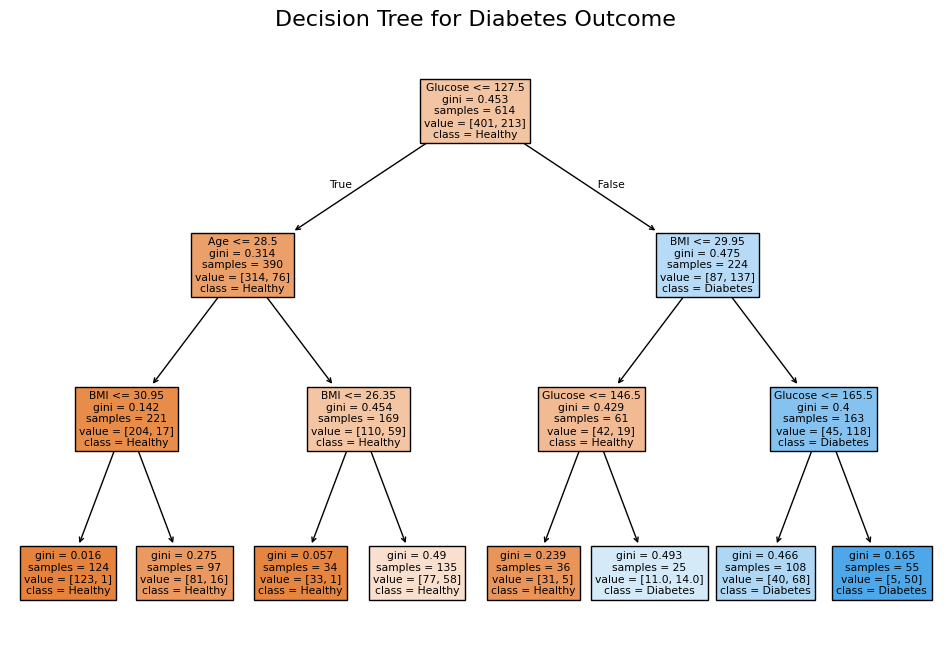

In [136]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini, feature_names=X.columns, class_names=['Healthy', 'Diabetes'], filled=True)
plt.title('Decision Tree for Diabetes Outcome', fontsize=16)
plt.show()

# Using matplotlib to create the decision tree of the Criterion Gini algorithm.

In [137]:
conf_matrix_en = confusion_matrix(y_test, y_pred_en)
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)

print("Confusion Matrix Entropy:\n", conf_matrix_en)
print("Confusion Matrix Gini Index:\n", conf_matrix_gini)

# Printing the confusion matrix of both Criterion Entropy and Criterion Gini.

Confusion Matrix Entropy:
 [[83 16]
 [20 35]]
Confusion Matrix Gini Index:
 [[83 16]
 [21 34]]


In [138]:
# 3. Naive Bayes Classifier

nb = GaussianNB()
nb.fit(X_train, y_train)

# Modelling using Naive Bayes Classifier.

GaussianNB()

In [139]:
y_pred_nb = nb.predict(X_test)

# Predicting the X_test using the Naive Bayes Classifier model.

In [140]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Model accuracy score: {accuracy_nb:.4f}")

# Showing the accuracy score based on the y_test and y_pred, and it results with a decent 76.62 percent accuracy, similar to using Criterion Entropy.

Model accuracy score: 0.7662


In [141]:
y_train_nb = nb.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_nb)
training_accuracy = accuracy_score(y_train, y_train_nb)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

# Since the margin is only less than 5%, we can conclude that the model is well-fitted.

Testing accuracy: 0.7662
Training accuracy: 0.7524


In [142]:
# 4. Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

# Modelling and fitting using random forest classifier, with estimators of 100 times.

RandomForestClassifier(random_state=42)

In [143]:
y_pred_rf = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)

print(f'Accuracy: {accuracy}')

# Showing the accuracy score based on the y_test and y_pred, and it results with a decent 72 percent accuracy, similar to using Criterion Entropy.

Accuracy: 0.7207792207792207


In [144]:
y_train_rf = nb.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_rf)
training_accuracy = accuracy_score(y_train, y_train_rf)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

# Since the margin is only less than 5%, we can conclude that the model is well-fitted.

Testing accuracy: 0.7208
Training accuracy: 0.7524


In [148]:
cm_en = confusion_matrix(y_test, y_pred_en)
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix Entropy:")
print(cm_en)
print("\nConfusion Matrix Gini:")
print(cm_gini)
print("\nConfusion Matrix Naive Bayes:")
print(cm_nb)
print("\nConfusion Matrix Random Forest:")
print(cm_rf)


# Confusion matrix of each models

Confusion Matrix Entropy:
[[83 16]
 [20 35]]

Confusion Matrix Gini:
[[83 16]
 [21 34]]

Confusion Matrix Naive Bayes:
[[79 20]
 [16 39]]

Confusion Matrix Random Forest:
[[77 22]
 [21 34]]


In [147]:
class_report_en = classification_report(y_test, y_pred_en)
class_report_gini = classification_report(y_test, y_pred_gini)
class_report_nb = classification_report(y_test, y_pred_nb)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Classification Report Entropy: \n", class_report_en)
print("Classification Report Gini Index: \n", class_report_gini)
print("Classification Report Naive Bayes: \n", class_report_nb)
print("Classification Report Random Forest: \n", class_report_rf)


# Printing the classification report both Criterion Entropy and Criterion Gini.

Classification Report Entropy: 
               precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

Classification Report Gini Index: 
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

Classification Report Naive Bayes: 
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.7

In [149]:
# Conclusion
# From the results above (especially accuracy), we can conclude that the best models are the decision tree with criterion Entropy, and the Naive Bayes classifier.
# Random forest has the lowest stats or results of them all, showing the highest percentage of errors and lowest accuracy.
# Overall, all models are better at predicting the outcome of 0 (healthy or non-diabetic), while for the outcome of 1, the best might be the Naive Bayes classifier.
# The data is slightly leaning towards predicting the outcome of '0', due to the majority of data having outcome of 0.